In [1]:
import my_modules.monte_carlo as mc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

C:\Users\jdivers\PycharmProjects\df_image_analysis\.venv\Lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [19]:
dw = mc.OpticalMedium(n=1.33, mu_a=0.02, mu_s=0.003, g=0, type='water')
g = mc.OpticalMedium(n=1.523, mu_a=0, mu_s=0.003, g=0,type= 'glass')
t = mc.OpticalMedium(n=1.33, mu_a=5, mu_s=100, g=0.85, type='tissue')
surroundings_n = 1.33

OD = 0.3205672345588178
ID = 0.27206723455881785
theta = 0.5743788414166319

sampler = mc.monte_carlo.ring_pattern((ID, OD), np.arctan(-OD / 0.2))
LED = mc.Illumination(pattern=sampler)
detector = mc.Detector(mc.monte_carlo.cone_of_acceptance(ID))


# Simulation comparisons
| ID | System               | Simulation method | Recursion | Illumination direction | Illumination Incidence | Detector   | Comparison | Notes                                         |
|:---|:---------------------|:------------------|:----------|:-----------------------|:-----------------------|:-----------|:-----------|:----------------------------------------------|
| 1  | Tissue               | Manual Method     | False     | Normal                 | Origin                 | None       | A          |                                               |
| 2  | Tissue               | Photon Method     | False     | Normal                 | Origin                 | None       | AB         |                                               |
| 3  | Tissue               | Photon Method     | True      | Normal                 | Origin                 | None       | BC         |                                               |
| 4  | Tissue               | Photon Method     | True      | Oblique                | Origin                 | None       | CD         | Compared methods of direciton in sub-a and -b |
| 5  | Tissue               | Photon Method     | True      | Oblique                | Ring                   | None       | DE         |                                               |
| 6  | Tissue               | Photon Method     | True      | Oblique                | Ring                   | Inner cone | EF         |                                               |
| 7  | Water, Tissue        | Photon Method     | True      | Oblique                | Ring                   | Inner cone | FG         |                                               |
| 8  | Water, Glass, Tissue | Photon Method     | True      | Oblique                | Ring                   | Inner cone | G          |                                               |



## Simulation 1

In [20]:
s = mc.System(
    t, float('inf'),
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector, 0),
)
n = 500

0 total internal reflectance events.
0.00% of photons transmitted. 
21.13% of photons reflected 
78.88% of photons absorbed 
500 total photons simulated.
-0.00% overage of photons.


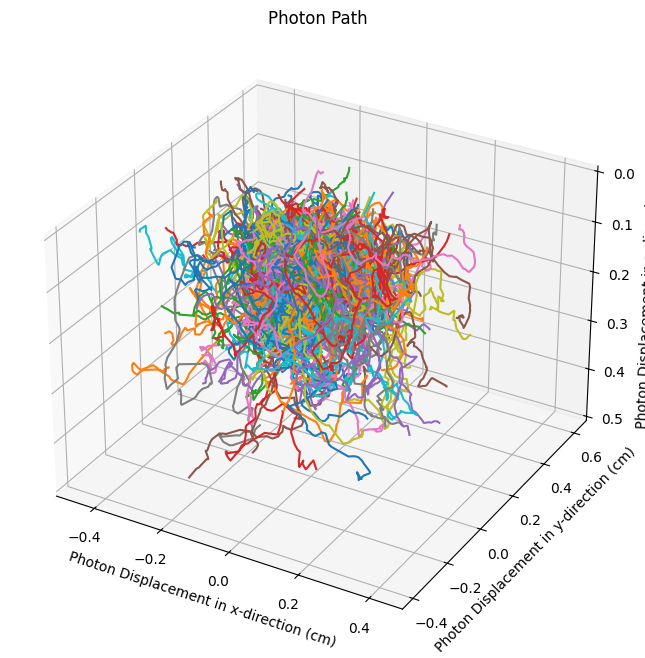

In [21]:
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, system=s, recurse=False, russian_roulette_constant=20)
    while not photon.is_terminated:
        photon.absorb()
        photon.move()
        photon.scatter()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 2

0 total internal reflectance events.
0.00% of photons transmitted. 
24.11% of photons reflected 
75.84% of photons absorbed 
500 total photons simulated.
0.05% overage of photons.


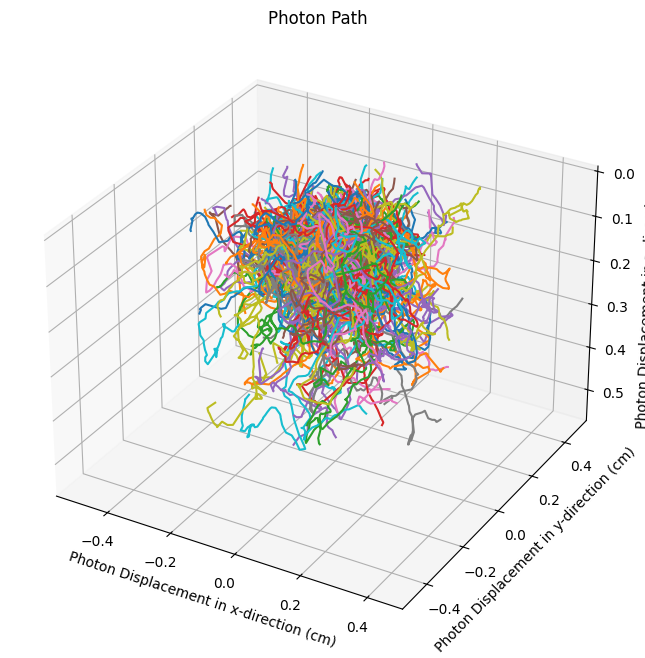

In [22]:
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, system=s, recurse=False, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 3

0 total internal reflectance events.
0.00% of photons transmitted. 
23.41% of photons reflected 
76.70% of photons absorbed 
501 total photons simulated.
-0.11% overage of photons.


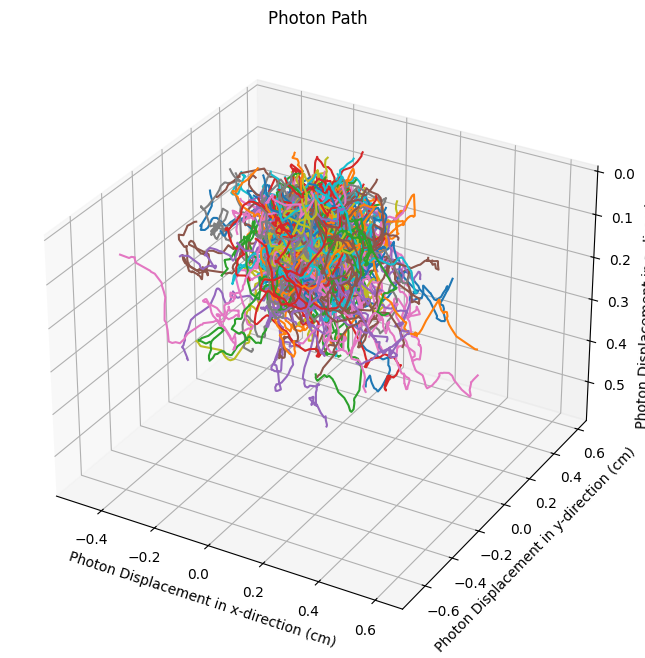

In [23]:
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 4
### 4a

0 total internal reflectance events.
0.00% of photons transmitted. 
28.05% of photons reflected 
71.93% of photons absorbed 
500 total photons simulated.
0.02% overage of photons.


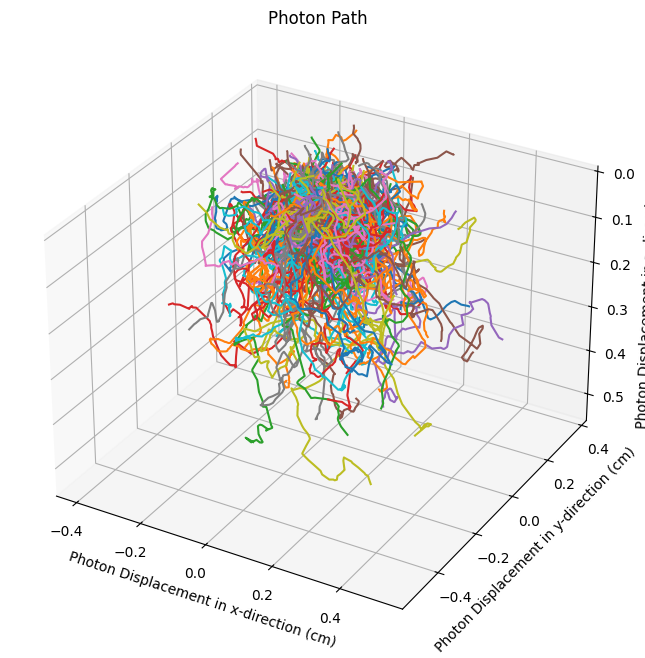

In [24]:
phi = 2 * np.pi * np.random.rand()
dir_cos = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
T, R, A = 3 * [0]
tir = 0
ax = None
for i in range(n):
    photon = mc.Photon(650, directional_cosines=dir_cos, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

### 4b

0 total internal reflectance events.
0.00% of photons transmitted. 
38.78% of photons reflected 
61.34% of photons absorbed 
501 total photons simulated.
-0.12% overage of photons.


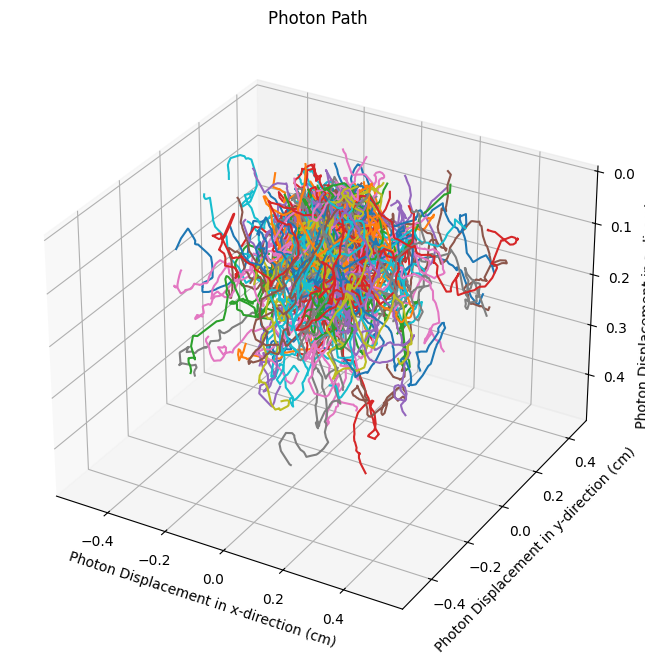

In [25]:
tir = 0
T, R, A = 3 * [0]
ax = None
for i in range(n):
    location, direction = sampler()
    photon = mc.Photon(650, directional_cosines=direction, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    _, ax = photon.plot_path(axes=ax)
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 5
### 5a

0 total internal reflectance events.
0.00% of photons transmitted. 
40.68% of photons reflected 
59.29% of photons absorbed 
500 total photons simulated.
0.03% overage of photons.


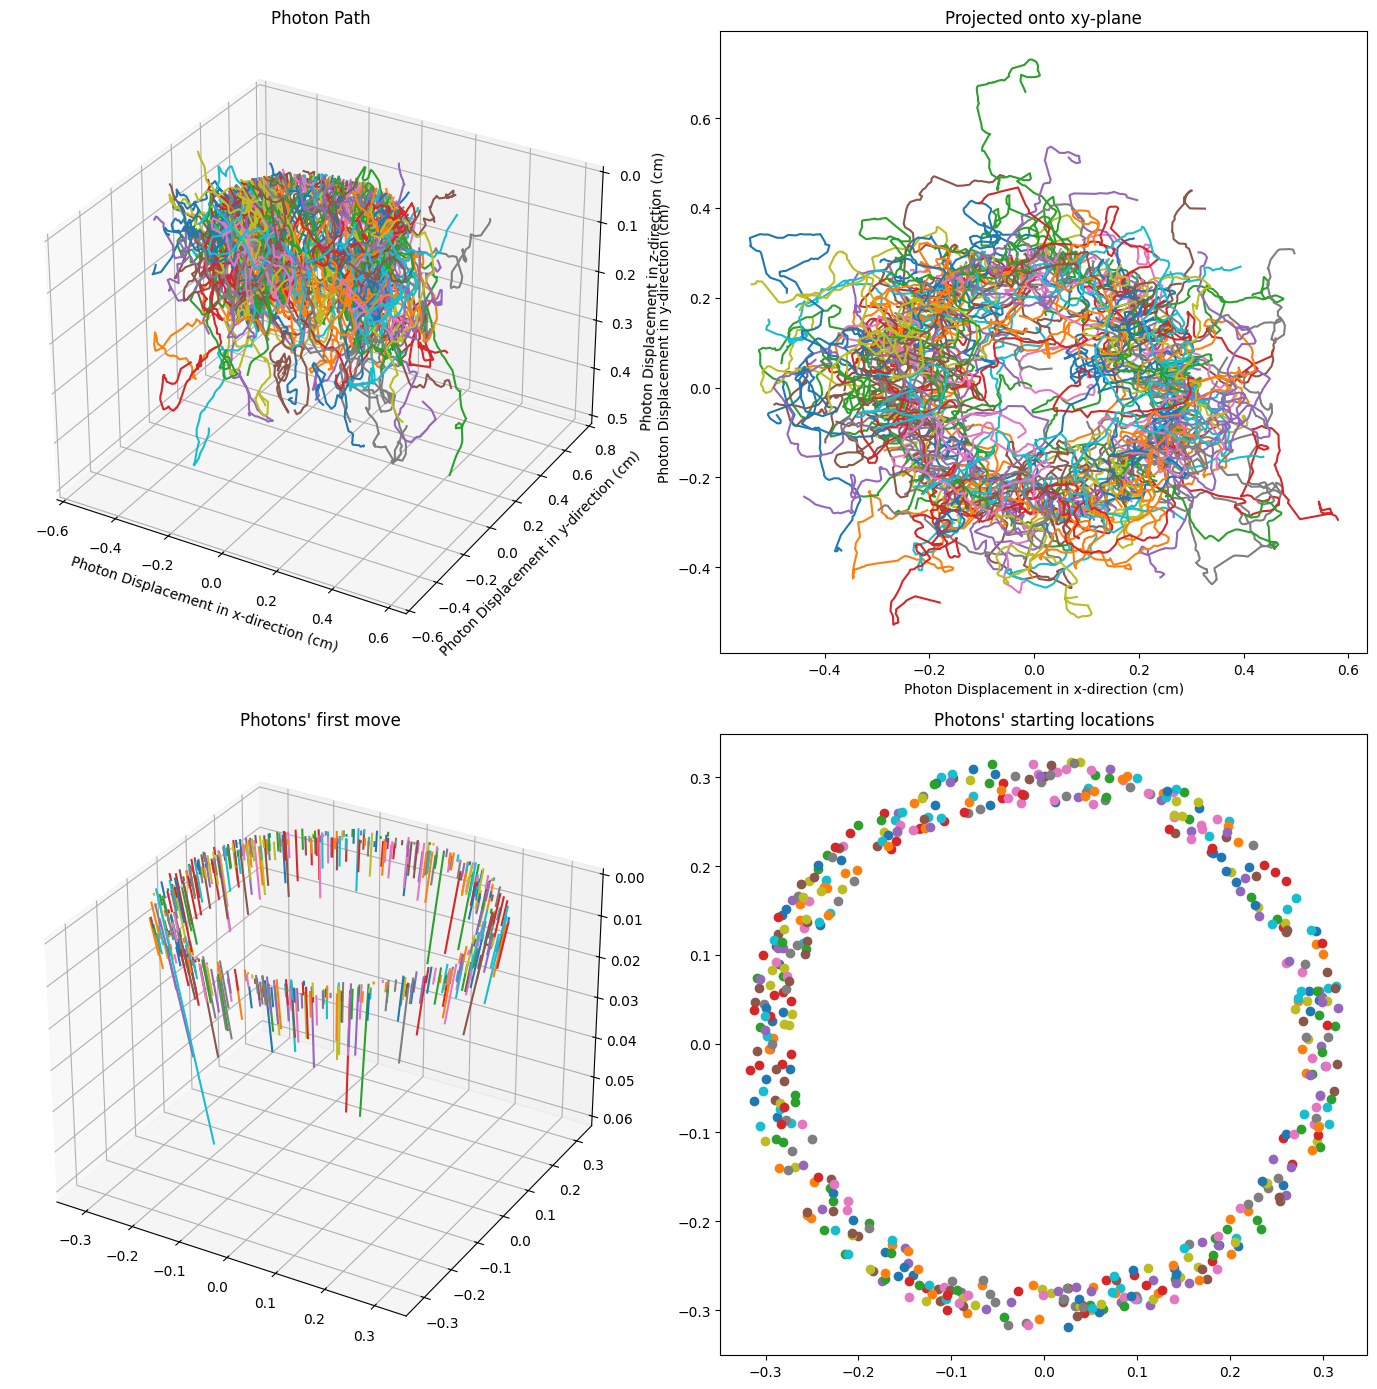

In [26]:
tir = 0
T, R, A = 3 * [0]
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(2, 2, 1, projection='3d'), fig.add_subplot(2, 2, 2), 
    fig.add_subplot(2, 2, 3, projection='3d'), fig.add_subplot(2, 2, 4)
])
for i in range(n):
    location, direction = sampler()
    photon = mc.Photon(650, location_coordinates=location, directional_cosines=direction, system=s, recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

### 5b

0 total internal reflectance events.
0.00% of photons transmitted. 
37.80% of photons reflected 
62.24% of photons absorbed 
500 total photons simulated.
-0.04% overage of photons.


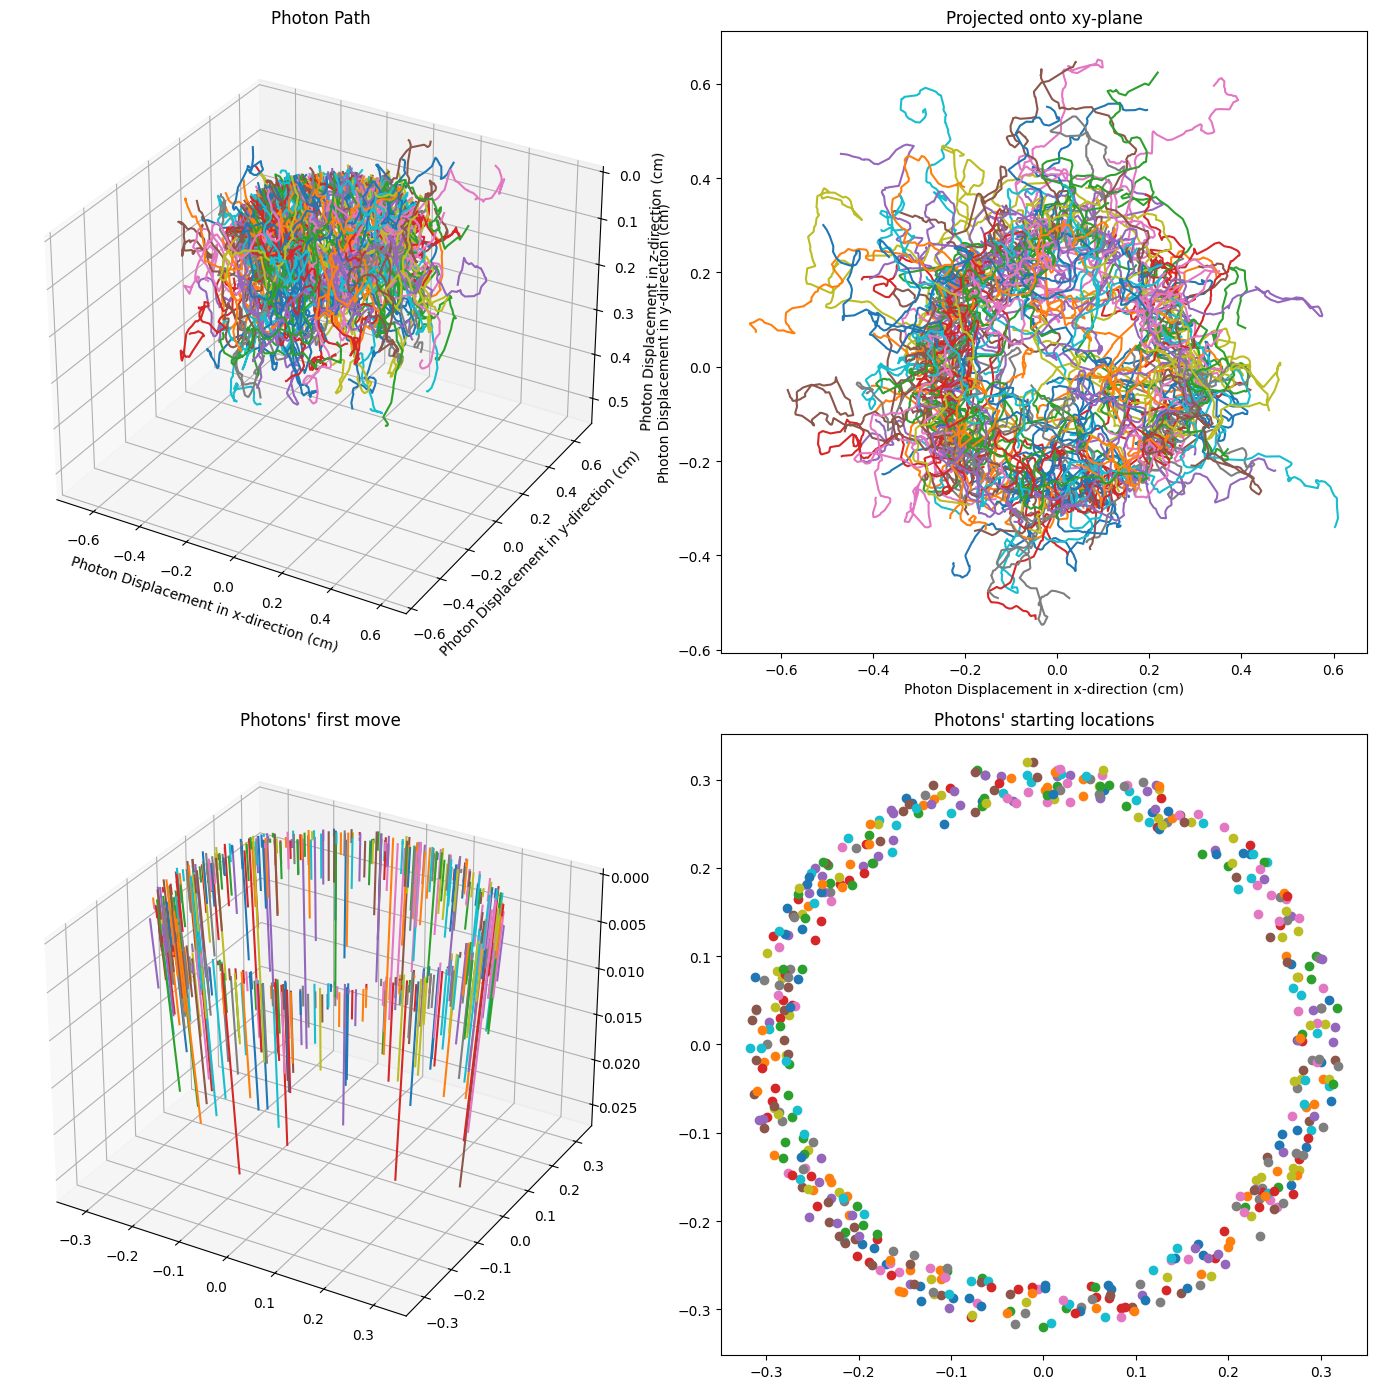

In [27]:
tir = 0
T, R, A = 3 * [0]
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(2, 2, 1, projection='3d'), fig.add_subplot(2, 2, 2), 
    fig.add_subplot(2, 2, 3, projection='3d'), fig.add_subplot(2, 2, 4)
])
for i in range(n):
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 6
### 6a

0 total internal reflectance events.
0.00% of photons transmitted. 
38.44% of photons reflected 
61.58% of photons absorbed 
500 total photons simulated.
17.86% of photons detected 
-0.02% overage of photons.


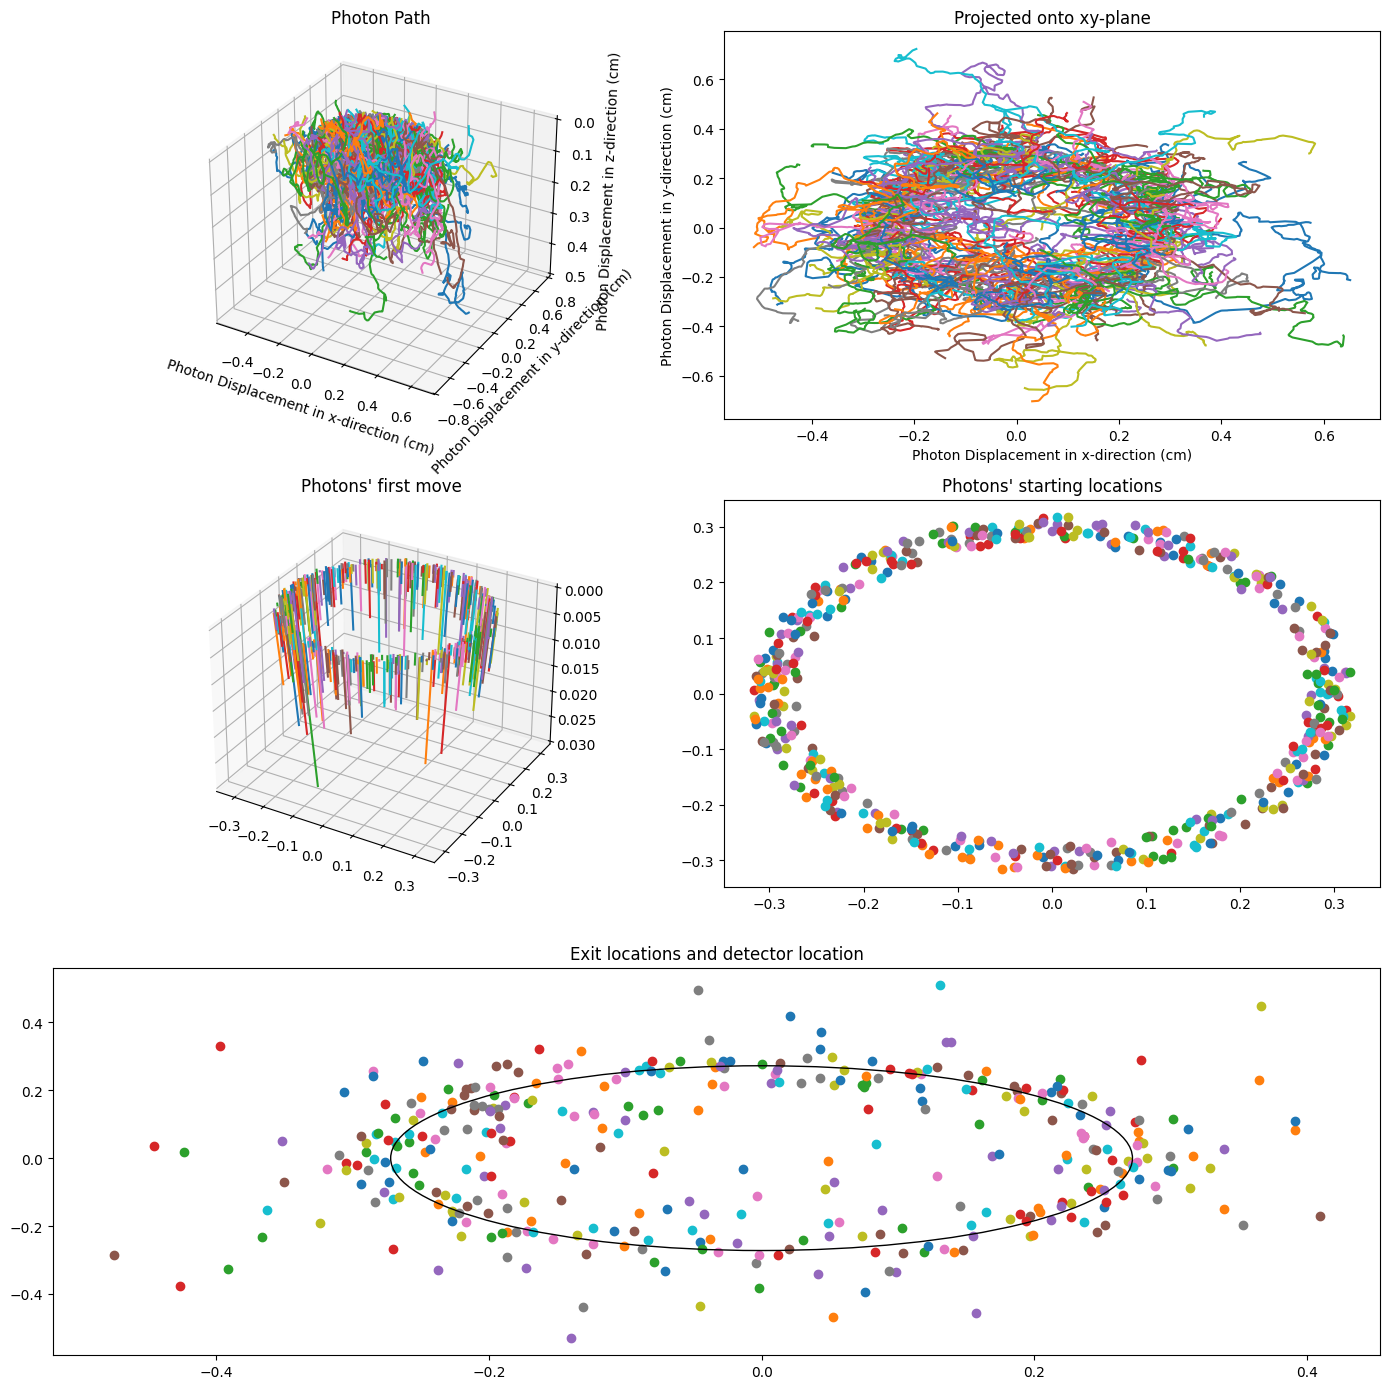

In [28]:
tir = 0
T, R, A = 3 * [0]
detected = 0
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(3, 2, 1, projection='3d'), fig.add_subplot(3, 2, 2), 
    fig.add_subplot(3, 2, 3, projection='3d'), fig.add_subplot(3, 2, 4),
    fig.add_subplot(3, 1, 3)
])
for i in range(n):
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    exit_r = np.sqrt(photon.exit_location[0] ** 2 + photon.exit_location[1] ** 2)  if photon.exit_location is not None else float('inf')
    if exit_r < ID:
        detected += photon.R
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
    if photon.exit_location is not None and photon.exit_location[2] == 0:
        x, y, z = photon.exit_location
        ax[4].scatter(x,y)
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
detector_circle = patches.Circle((0,0), ID, edgecolor='black', facecolor='none')
ax[4].add_patch(detector_circle)
ax[4].set_title('Exit locations and detector location')
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

### 6b

0 total internal reflectance events.
0.00% of photons transmitted. 
38.50% of photons reflected 
61.56% of photons absorbed 
500 total photons simulated.
16.26% of photons detected 
-0.07% overage of photons.


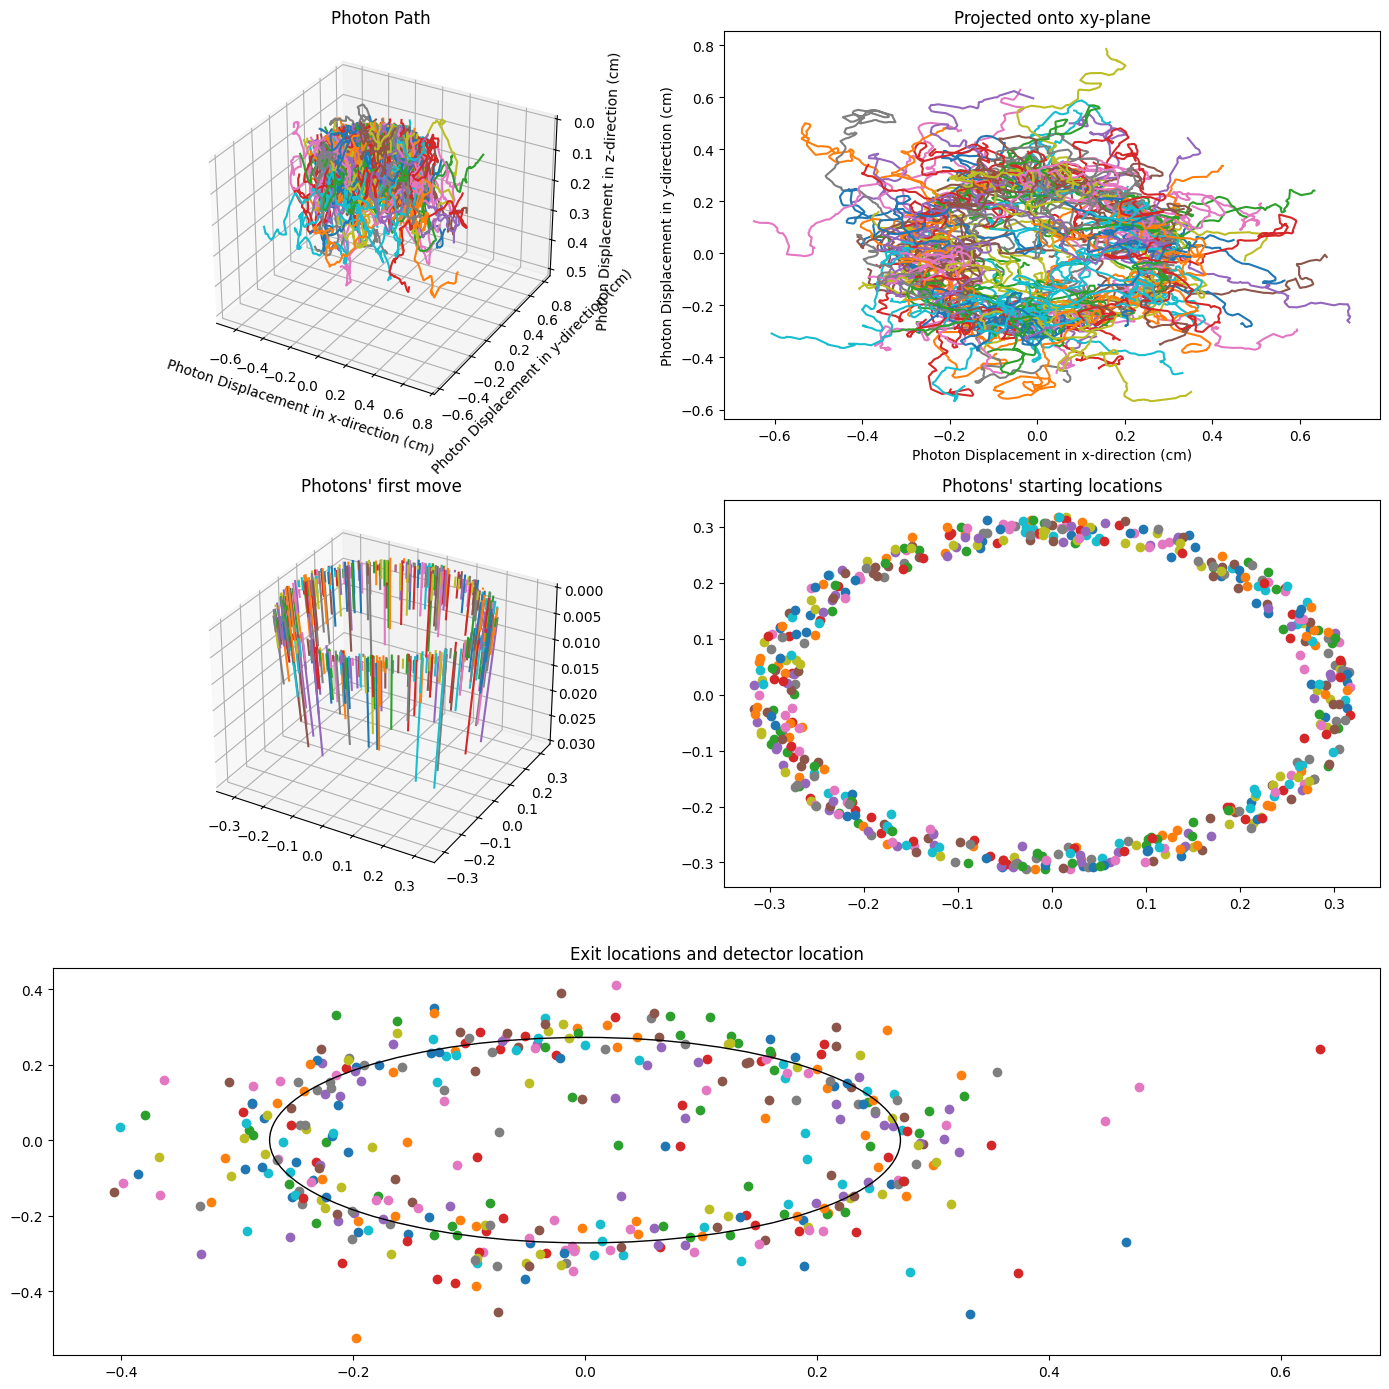

In [29]:
tir = 0
T, R, A = 3 * [0]
detector.reset()
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(3, 2, 1, projection='3d'), fig.add_subplot(3, 2, 2), 
    fig.add_subplot(3, 2, 3, projection='3d'), fig.add_subplot(3, 2, 4),
    fig.add_subplot(3, 1, 3)
])
for i in range(n):
    location, direction = sampler()
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
    if photon.exit_location is not None and photon.exit_location[2] == 0:
        x, y, z = photon.exit_location
        ax[4].scatter(x,y)
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
detector_circle = patches.Circle((0,0), ID, edgecolor='black', facecolor='none')
ax[4].add_patch(detector_circle)
ax[4].set_title('Exit locations and detector location')
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detector.n_detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 7

In [30]:
s = mc.System(
    dw, 0.2,
    t, float('inf'),
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector,0)
)
n = 500

0 total internal reflectance events.
0.00% of photons transmitted. 
3.20% of photons reflected 
96.67% of photons absorbed 
499 total photons simulated.
19.24% of photons detected 
0.13% overage of photons.


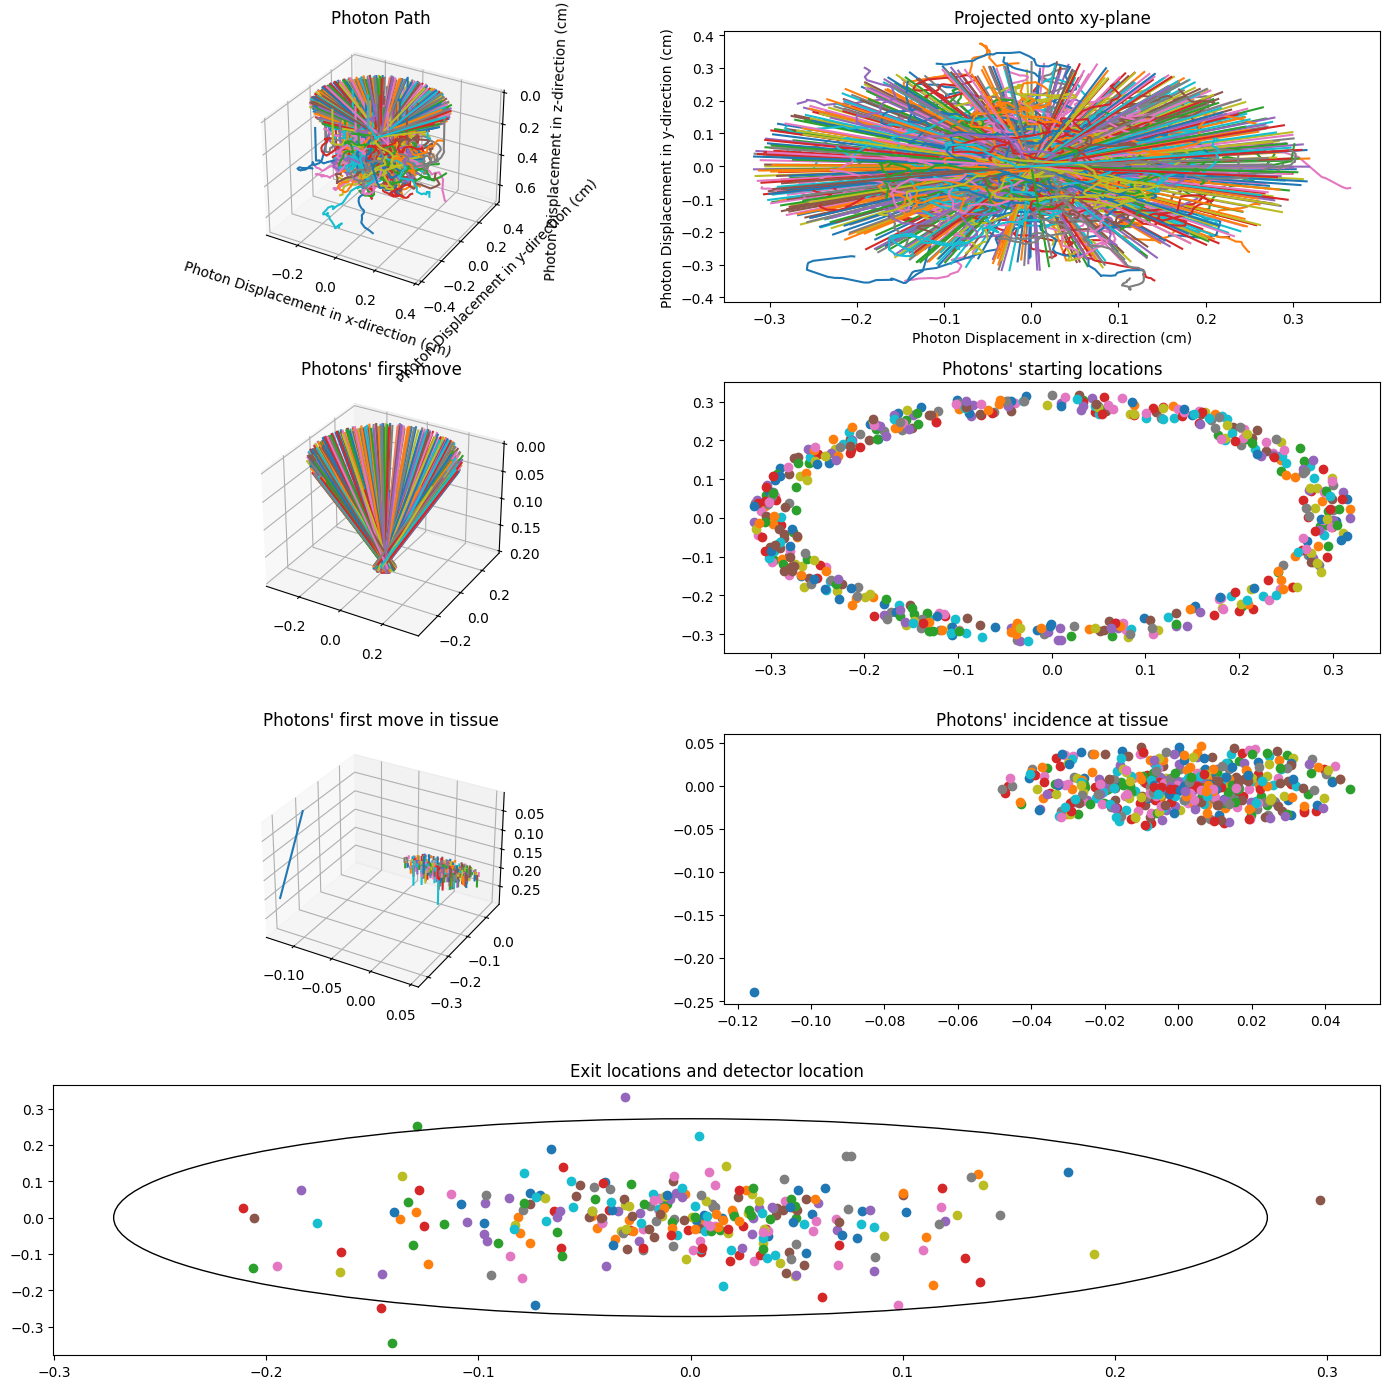

In [31]:
tir = 0
T, R, A = 3 * [0]
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(4, 2, 1, projection='3d'), fig.add_subplot(4, 2, 2), 
    fig.add_subplot(4, 2, 3, projection='3d'), fig.add_subplot(4, 2, 4),
    fig.add_subplot(4, 2, 5, projection='3d'), fig.add_subplot(4, 2, 6),
    fig.add_subplot(4, 1, 4)
])
for i in range(n):
    location, direction = sampler()
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
    x,y,z = zip(photon.location_history[1], photon.location_history[2])
    ax[4].plot(x,y,z)
    ax[5].scatter(*photon.location_history[1][:2])
    if photon.exit_location is not None and photon.exit_location[2] == 0:
        x, y, z = photon.exit_location
        ax[6].scatter(x,y)
    
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
ax[4].set_title("Photons' first move in tissue")
ax[4].invert_zaxis()
ax[5].set_title("Photons' incidence at tissue")
detector_circle = patches.Circle((0,0), ID, edgecolor='black', facecolor='none')
ax[6].add_patch(detector_circle)
ax[6].set_title('Exit locations and detector location')
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detector.n_detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))

## Simulation 8

In [32]:
s = mc.System(
    dw, 0.2,
    g, 0.017,
    t, float('inf'),
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector,0)
)
n = 500

0 total internal reflectance events.
0.00% of photons transmitted. 
3.36% of photons reflected 
96.73% of photons absorbed 
500 total photons simulated.
3.07% of photons detected 
-0.09% overage of photons.


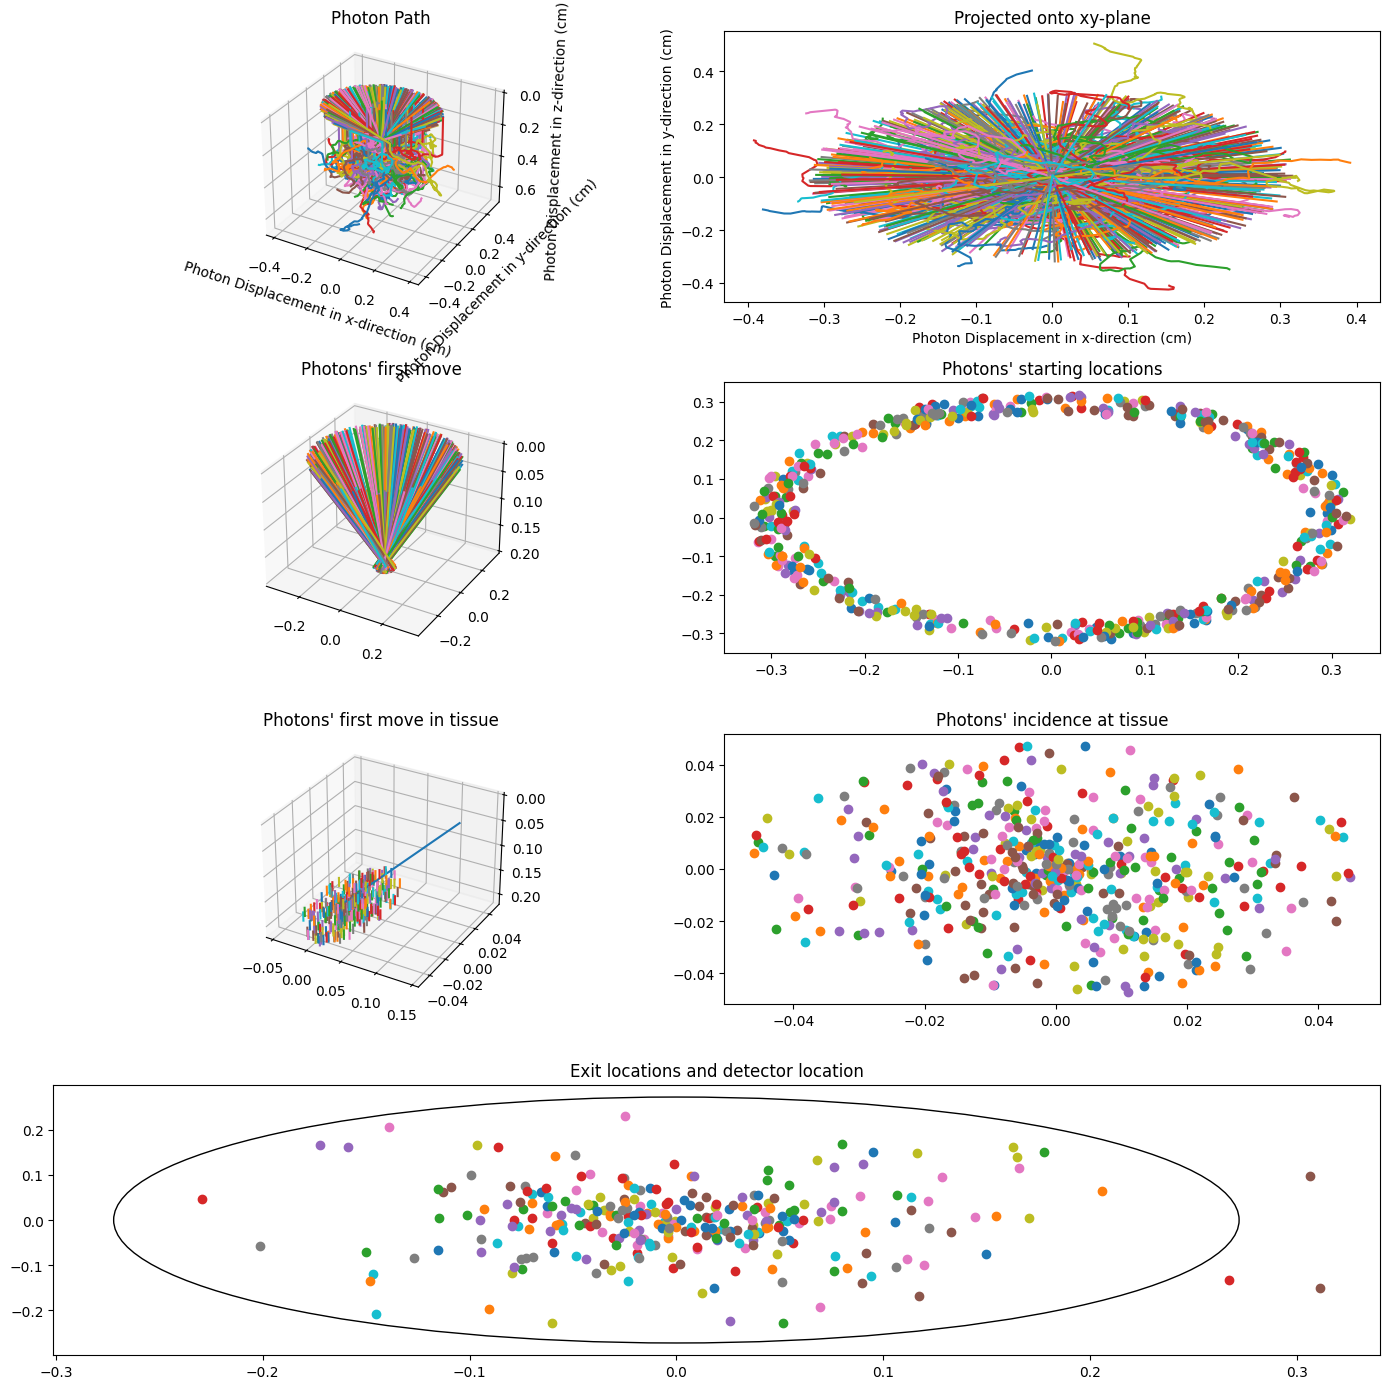

In [33]:
tir = 0
T, R, A = 3 * [0]
detector.reset()
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(4, 2, 1, projection='3d'), fig.add_subplot(4, 2, 2), 
    fig.add_subplot(4, 2, 3, projection='3d'), fig.add_subplot(4, 2, 4),
    fig.add_subplot(4, 2, 5, projection='3d'), fig.add_subplot(4, 2, 6),
    fig.add_subplot(4, 1, 4)
])
for i in range(n):
    location, direction = sampler()
    photon = s.beam(recurse=True, russian_roulette_constant=20)
    photon.simulate()
    T += photon.T
    R += photon.R
    A += photon.A
    tir += photon.tir_count
    photon.plot_path(axes=ax[0])
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    x,y,z = zip(photon.location_history[0], photon.location_history[1])
    ax[2].plot(x, y, z)
    ax[3].scatter(*photon.location_history[0][:2])
    x,y,z = zip(photon.location_history[1], photon.location_history[2])
    ax[4].plot(x,y,z)
    ax[5].scatter(*photon.location_history[1][:2])
    if photon.exit_location is not None and photon.exit_location[2] == 0:
        x, y, z = photon.exit_location
        ax[6].scatter(x,y)
    
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
ax[4].set_title("Photons' first move in tissue")
ax[4].invert_zaxis()
ax[5].set_title("Photons' incidence at tissue")
detector_circle = patches.Circle((0,0), ID, edgecolor='black', facecolor='none')
ax[6].add_patch(detector_circle)
ax[6].set_title('Exit locations and detector location')
fig.tight_layout()
print("{}".format(tir) + ' total internal reflectance events.')
print("{:.2f}".format(T/n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(R/n * 100) + '% of photons reflected ')
print("{:.2f}".format(A/n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([T,R,A])) + ' total photons simulated.')
print("{:.2f}".format(detector.n_detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([T,R,A])) / n))